<a href="https://colab.research.google.com/github/lphuong304/CS114.L21/blob/main/COLAB_ASSIGNMENTS/COLAB_ASSIGNMENTS_26_04_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align="center"><b>BÀI TẬP COLAB SỐ 02 - 26/04/2021</b></h1>
<h1 align="center"><b>PREDICT EXECUTION TIME OF A PROGRAM WITH GIVEN THE NUMBERS OF INPUT</b></h1>
###LỚP: CS114.L21
###NHÓM:
1. Nguyễn Ngọc Lan Phương - *19520227*
2. Hoàng Anh Tú - *19522450*
3. Nguyễn Quốc Huy - *19521623*

Nguồn tham khảo:

* [scale data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

* [Ridge regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

Link data:
* Data train: [data train](http://cs.uit.edu.vn/data2.txt)
* Data test
[data test 3](http://cs.uit.edu.vn/data3.txt) ; 
[data test 4](http://cs.uit.edu.vn/data4.txt)

Reference:


* [Xử lý dữ liệu](#xulydulieu)
* [Tạo model dự đoán execution time bằng Linear Regression](#linear_regression)
* [Phân chia tập dữ liệu lại bằng cross-validation và vẫn sử dụng model Linear Regression để train](#other_train_test_split)
* [Khởi tạo lại bộ tham số cho mô hình Linear Regression - Regulazation Parameter](#regulazation)
* [Sử dụng model khác](#other_model)


#1. XỬ LÝ DỮ LIỆU:
<a name = "xulydulieu"></a>

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
import warnings
warnings.filterwarnings('ignore')

In [111]:
#đọc data và sử dụng hàm read_csv để hiển thị data dưới dạng cột
colnames = ['Numbers of input', 'Execution time']
#data2.txt được dùng để traning model
data_to_train = pd.read_csv("http://cs.uit.edu.vn/data2.txt", names = colnames, header = None)

#data3.txt và data4.txt dùng để test model
data_to_test3 = pd.read_csv("http://cs.uit.edu.vn/data3.txt", names = colnames, header = None)
data_to_test4 = pd.read_csv("http://cs.uit.edu.vn/data4.txt", names = colnames, header = None)

#demo tập dữ liệu bằng cách in ra màn hình 5 dòng đầu tiên
print(data_to_train.head())



   Numbers of input  Execution time
0           6083695        0.521842
1           1954367        0.152648
2           3734185        0.298548
3           5839301        0.460480
4           6343427        0.527977


In [112]:
#phân chia dữ liệu trên tập train
x_train = np.array(data_to_train['Numbers of input']).reshape(-1,1) #x_train gòm cột numbers of input là dữ liệu đầu vào
y_train = np.array(data_to_train['Execution time']) #dữ liệu đầu ra (cần dự đoán)

#phân chia dữ liệu trên tập test từ data3.txt
x_test_data3 = np.array(data_to_test3['Numbers of input']).reshape(-1, 1)
y_test_data3 = np.array(data_to_test3['Execution time'])

#phân chia dữ liệu trên tập test từ data4.txt
x_test_data4 = np.array(data_to_test4['Numbers of input']).reshape(-1, 1)
y_test_data4 = np.array(data_to_test4['Execution time'])

Trực quan hóa dữ liệu train bằng mô hình từ thư viện myplotlib.


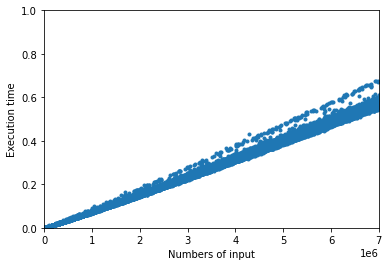

In [113]:
plt.plot(x_train, y_train, '.')
plt.xlabel('Numbers of input')
plt.ylabel('Execution time')
plt.axis([0, 7000000, 0, 1])
plt.show()

#2. TẠO MODEL DỰ ĐOÁN EXECUTION TIME BẰNG LINEAR REGRESSION
<a name = "linear_regression"> </a>

Chúng em sẽ xây dựng một model dự đoán thời gian thực thi của chương trình từ dữ liệu. Sử dụng **Linear Regression!**

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

#tạo model train
lr = LinearRegression().fit(x_train, y_train)

#tính toán độ lỗi của model trên tập dữ liệu train
print("Mean squred error with data_to_train: ", mean_squared_error(y_train, lr.predict(x_train)))

Mean squred error with data_to_train:  0.00014337728721748835


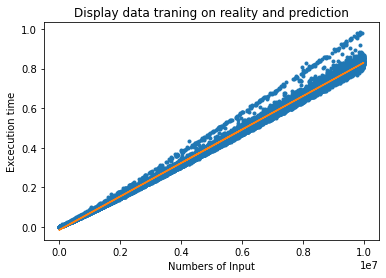

In [115]:
#trực quan hóa trên kết quả dự đoán và thực tế bằng thư viện matplotlib

plt.plot(x_train, y_train, ".")
plt.plot(x_train, lr.predict(x_train))
plt.title("Display data traning on reality and prediction")
plt.xlabel('Numbers of Input')
plt.ylabel('Excecution time')
plt.show()

Nhận thấy độ lỗi của model khá nhỏ, chứng tỏ độ model hoạt động tốt trên tập train. Ta tiến hành đo độ lỗi trên tập test.

In [116]:
#tính toán độ lỗi của model trên tập dữ liệu data_to_test_3
print("Mean squared error with data3.txt: ", mean_squared_error(y_test_data3, lr.predict(x_test_data3)))
#tính toán độ lỗi của model trên tập dữ liệu data_to_test_3
print("Mean squared error with data4.txt: ", mean_squared_error(y_test_data4, lr.predict(x_test_data4)))


Mean squared error with data3.txt:  0.020664949397549082
Mean squared error with data4.txt:  0.22348476817426036


Trực quan hóa dữ liệu trên hai tập test(y_test_data3 và y_test_data4) và tập dự đoán từ đầu vào hai tập test trên.


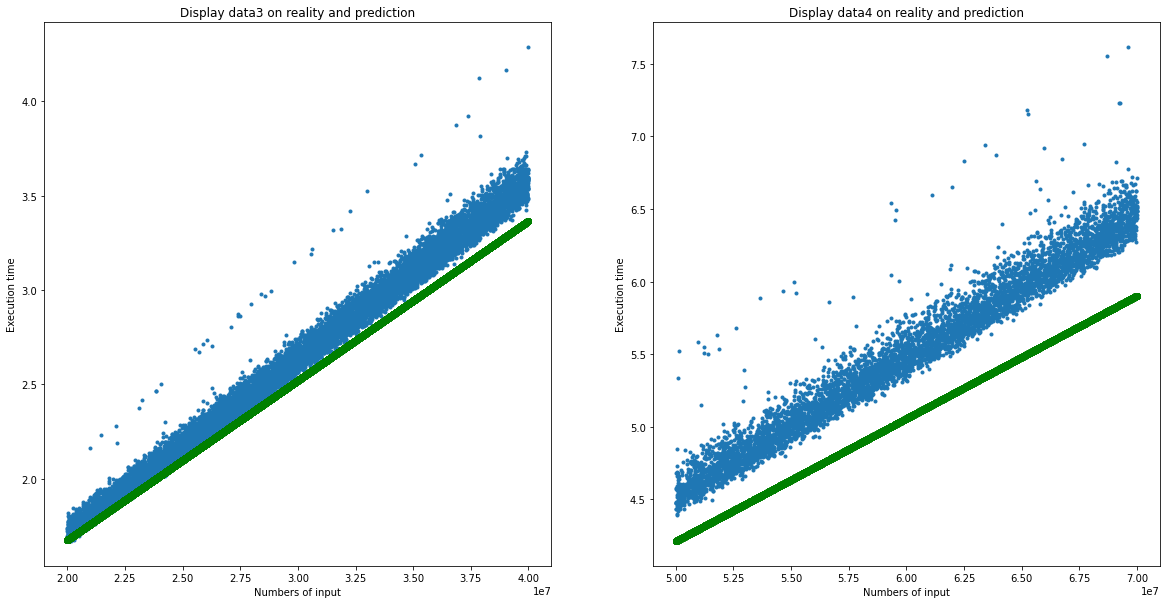

In [117]:
fig, (axs1, axs2) = plt.subplots(1,2, figsize = (20,10))
axs1.plot(x_test_data3, y_test_data3, '.' )
axs1.plot(x_test_data3, lr.predict(x_test_data3), 'go' )


axs1.set_title("Display data3 on reality and prediction")
axs1.set(xlabel='Numbers of input', ylabel='Execution time')


axs2.plot(x_test_data4, y_test_data4, '.' )
axs2.plot(x_test_data4, lr.predict(x_test_data4), 'go' )


axs2.set_title("Display data4 on reality and prediction")
axs2.set(xlabel='Numbers of input', ylabel='Execution time')

plt.show()

**KẾT LUẬN**: Model hoạt động tốt trên tập train (độ lỗi thấp) nhưng tệ trên 2 tập test (độ lỗi cao). Ta cân nhắn sử dụng model khác hoặc cách chia tập dữ liệu khác để train. Chúng em tiến hành như sau:


In [118]:
# xử lý lại ba tập dữ liệu để tiến hành chia data theo cross-validation
# gộp tập dữ liệu data_to_train và data_to_test3 và data_to_test4
combine_train_data_data3 = pd.concat([data_to_train, data_to_test3], axis = 0)
data = pd.concat([combine_train_data_data3, data_to_test4], axis = 0)
data = data.reset_index()
data_x = np.array(data['Numbers of input'])
data_y = np.array(data['Execution time'])

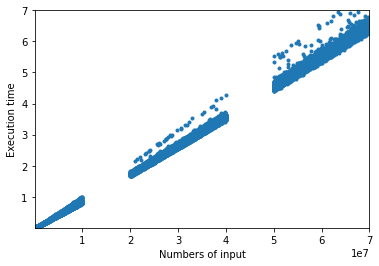

In [119]:
#trực quan hóa ba tập dữ liệu trên cùng một biểu đồ
plt.plot(data_x, data_y, '.')
plt.xlabel('Numbers of input')
plt.ylabel('Execution time')
plt.axis([200, 70000000, 8.601e-06, 7])
plt.show()

**KẾT LUẬN**: Sau khi sử dụng cách phân chia dữ liệu khác là cross-validation ta nhận thấy độ lỗi trên ba tập dữ liệu đền rất nhỏ, chứng tỏ model không còn bị overfitting và xử lý được nguyên do dữ liệu có sự khác biệt lớn. Chúng em suy nghĩ đến cách tiền xử lý dữ liệu.

#3. TIỀN XỬ LÝ DỮ LIỆU - REGULAZATION IN LINEAR REGRESSION
<a name = "regulazation"> </a>

##3.1 SCALE DATA:
* Ý tưởng: Điều chỉnh input của các tập data sao cho phân phối của chúng có giá trị trung bình là $0$ và độ lệch chuẩn là 1. Mỗi giá trị trong tập dữ liệu sẽ có giá trị trung bình bị trừ đi và sau đó chia cho độ lệch chuẩn của toàn bộ tập dữ liệu (hoặc đối tượng trong trường hợp đa biến). 
 



In [120]:
#scale input data trên tập train và test
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler().fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test3 = scaler.transform(x_test_data3)
scaled_x_test4 = scaler.transform(x_test_data4)


In [121]:
#tính toán độ lỗi của model trên tập dữ liệu train
print("Mean squred error with linear regression on scaled data_to_train: ", mean_squared_error(y_train, lr.predict(scaled_x_train)))
#tính toán độ lỗi của model trên tập dữ liệu data_to_test_3
print("Mean squared error with linear regression on scaled data3.txt: ", mean_squared_error(y_test_data3, lr.predict(scaled_x_test3)))
#tính toán độ lỗi của model trên tập dữ liệu data_to_test_3
print("Mean squared error with linear regression on scaled data4.txt: ", mean_squared_error(y_test_data4, lr.predict(scaled_x_test4)))


Mean squred error with linear regression on scaled data_to_train:  0.23821327355778432
Mean squared error with linear regression on scaled data3.txt:  7.357391383610491
Mean squared error with linear regression on scaled data4.txt:  30.867539184686226


##3.2 SỬ DỤNG MODEL RIDGE REGRESSION VÀ LASSO REGRESSION ĐỂ TRAIN SCALED DATA
Kết quả trên rất tệ, nên chúng em suy nghĩ đến việc sử dụng một model regression khác, và sau khi tham khảo chúng em quyết định sử dụng model Ridge Regression với **l2 regularization**:

$\frac{\partial J_{\text{reg}} }{\partial \mathbf{w}} = \frac{\partial J}{\partial \mathbf{w}} + \lambda \mathbf{w}$

với lamda được biểu hiện là alpha trong hàm, giảm alpha sẽ làm tăng số lượng các hệ số w, làm model train tốt hơn.


* Ý tưởng: tiêu biến trọng số weights, nhằm giảm overfitting nhất có thể, số alpha 

* Chúng em cũng thử sử dụng Lasso Regression làm model train với tập dữ liệu đã xử lý như trên.

In [313]:
#sử dụng ridge regrssion
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
regr_cv = RidgeCV(alphas=np.arange(0.0, 1, 0.01))
_ridge = Ridge(alpha = -3500 ).fit(scaled_x_train,y_train ) 

#sử dụng lasso regrssion
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=[1e-10, 1.0, 10.0])
_lasso = Lasso(alpha = -0.01).fit(scaled_x_train,y_train )
model_lasso = lasso_cv.fit(scaled_x_train,y_train)


In [274]:
#tính toán độ lỗi của model trên tập dữ liệu train
print("Mean squred error with ridge regression on scaled data_to_train: ", mean_squared_error(y_train, _ridge.predict(scaled_x_train)))
#tính toán độ lỗi của model trên tập dữ liệu data_to_test_3
print("Mean squared error with ridge regression on scaled data3.txt: ", mean_squared_error(y_test_data3, _ridge.predict(scaled_x_test3)))
#tính toán độ lỗi của model trên tập dữ liệu data_to_test_3
print("Mean squared error with ridge regression on scaled data4.txt: ", mean_squared_error(y_test_data4, _ridge.predict(scaled_x_test4)))


Mean squred error with ridge regression on scaled data_to_train:  0.00030256777089064353
Mean squared error with ridge regression on scaled data3.txt:  0.004066225842167945
Mean squared error with ridge regression on scaled data4.txt:  0.06091183121399351


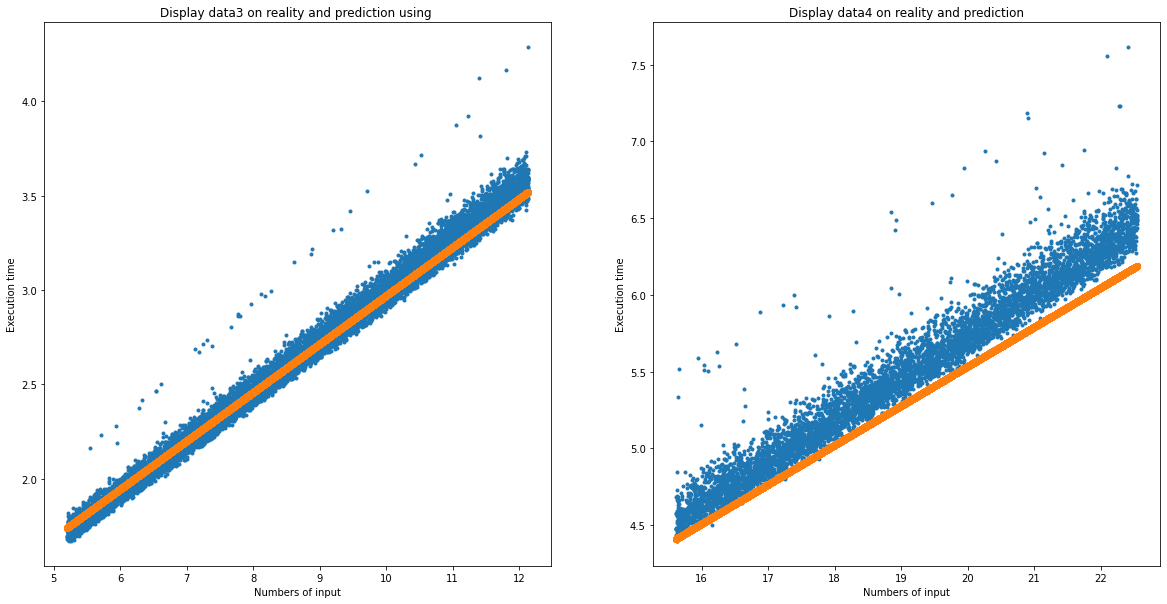

In [275]:
fig, (axs1, axs2) = plt.subplots(1,2, figsize = (20,10))
axs1.plot(scaled_x_test3, y_test_data3, '.' )
axs1.plot(scaled_x_test3, _ridge.predict(scaled_x_test3), 'o' )


axs1.set_title("Display data3 on reality and prediction using ridge regression: ")
axs1.set(xlabel='Numbers of input', ylabel='Execution time')


axs2.plot(scaled_x_test4, y_test_data4, '.' )
axs2.plot(scaled_x_test4, _ridge.predict(scaled_x_test4), 'o' )


axs2.set_title("Display data4 on reality and prediction ridge regression")
axs2.set(xlabel='Numbers of input', ylabel='Execution time')

plt.show()

In [314]:
#tính toán độ lỗi của model trên tập dữ liệu train
print("Mean squred error with lasso regression on scaled data_to_train: ", mean_squared_error(y_train, _lasso.predict(scaled_x_train)))
#tính toán độ lỗi của model trên tập dữ liệu data_to_test_3
print("Mean squared error with lasso regression on scaled data3.txt: ", mean_squared_error(y_test_data3, _lasso.predict(scaled_x_test3)))
#tính toán độ lỗi của model trên tập dữ liệu data_to_test_3
print("Mean squared error with lasso regression on scaled data4.txt: ", mean_squared_error(y_test_data4, _lasso.predict(scaled_x_test4)))


Mean squred error with lasso regression on scaled data_to_train:  0.00024337728721748918
Mean squared error with lasso regression on scaled data3.txt:  0.005437201337921271
Mean squared error with lasso regression on scaled data4.txt:  0.08499598269451879


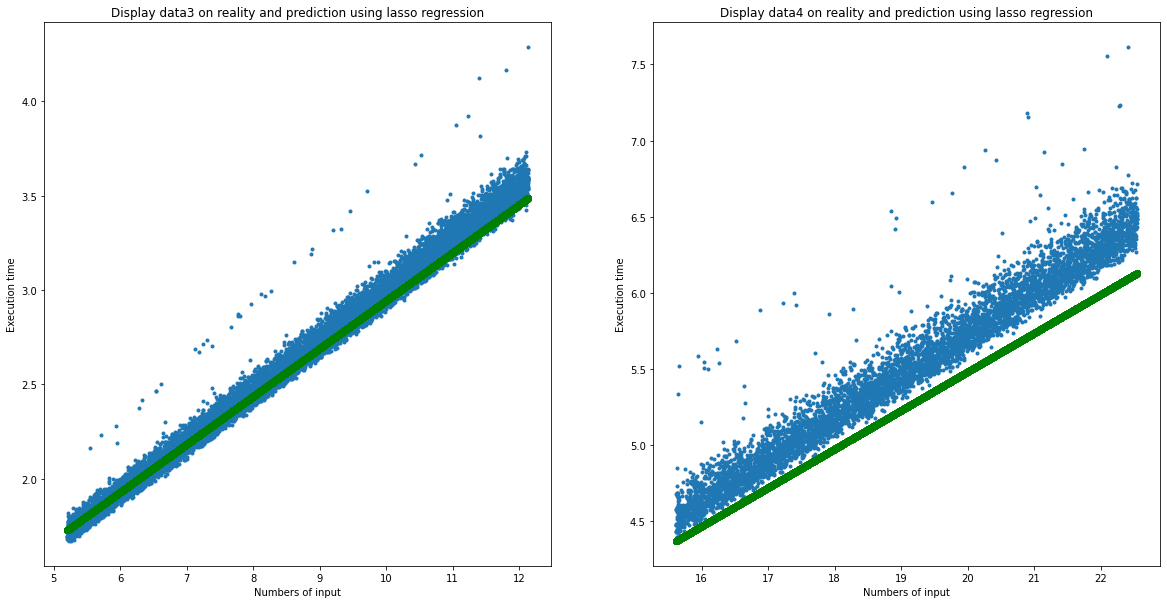

In [316]:
fig, (axs1, axs2) = plt.subplots(1,2, figsize = (20,10))
axs1.plot(scaled_x_test3, y_test_data3, '.' )
axs1.plot(scaled_x_test3, _lasso.predict(scaled_x_test3), 'go' )


axs1.set_title("Display data3 on reality and prediction using lasso regression")
axs1.set(xlabel='Numbers of input', ylabel='Execution time')


axs2.plot(scaled_x_test4, y_test_data4, '.' )
axs2.plot(scaled_x_test4, _lasso.predict(scaled_x_test4), 'go' )


axs2.set_title("Display data4 on reality and prediction using lasso regression")
axs2.set(xlabel='Numbers of input', ylabel='Execution time')

plt.show()

#5. NHẬN XÉT VÀ KẾT LUẬN
Việc data không nhất quán với nhau dẫn đến các model dễ bị overfitting do không nắm bắt được dữ liệu. Nên để tránh overfitting trong các mô hình regression để predict một giá trị chúng em rút ra được những bài học như sau:
1. Bước tiền xử lý dữ liệu là vô cùng quan trọng, ảnh hưởng nhiều tới kết quả model.
2. Việc lựa chọn tham số điều chỉnh trong các hàm sẽ giúp độ lỗi của model.